In [1]:
import numpy as np
from math import sqrt
from skimage.transform import resize
import sys
import cv2
import numpy as np
import cv2
import glob
import pandas as pd
import random
from matplotlib.image import imsave
import mahotas as mh
from scipy import ndimage
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import islice
from IPython.display import display_html
from statsmodels.regression.linear_model import OLS as lm
from IPython.display import display, HTML

sns.set_style("white", {'axes.grid' : False})
%matplotlib inline
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')
random.seed(1337)

/apps/well/python/3.5.2-gcc5.4.0/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


In [3]:
def predict_areas(input_img,mu=False,no=False):
    labels, no_objects = ndimage.label(input_img)
    props=regionprops(labels) 
    size={i:props[i].area for i in range (0, no_objects)}
    areas=[float(i) * (0.25**2) for i in size.values() if float(i) * (0.25**2) >= 200 and float(i) * (0.25**2) <= 16000]
    no_of_cells=len(areas)
    if mu and no:
        return(areas,np.mean(areas),no_of_cells)
    elif mu:
        return(areas,np.mean(areas))
    else:
        return(areas)

In [4]:
def plot_me(img_list,x=5,y=5):
    i = 1
    fig = plt.figure(figsize=(20,25))
    for r in random.sample(img_list,len(img_list)):
        ax = fig.add_subplot(x,y,i)
        i+=1
        plt.imshow(plt.imread(r))
        plt.title('%s'%'_'.join(r.split('/')[2].split('_')[3:5]))

In [5]:
test_tiles=pd.read_csv('adipoTiles.labeled.csv',index_col=0)
test_tiles.head()
adipocyte_tiles = test_tiles[test_tiles['sampleID'] =='ImageCollection'].reset_index()
adipocyte_tiles = adipocyte_tiles[adipocyte_tiles['adipocyte'] > 0.90].reset_index()
adipocyte_tiles.head()

,index,image,empty,not_adipocyte,adipocyte,sampleID
0,0,12288-78848_ImageCollection_0000000090_2018-05...,0.015654,0.038188,0.946158,ImageCollection
1,2,13312-54272_ImageCollection_0000000104_2018-05...,0.001704,0.033293,0.965003,ImageCollection
2,3,13312-55296_ImageCollection_0000000104_2018-05...,0.013140,0.027240,0.959620,ImageCollection
3,6,13312-78848_ImageCollection_0000000090_2018-05...,0.000231,0.001170,0.998599,ImageCollection
4,7,13312-79872_ImageCollection_0000000090_2018-05...,0.000975,0.006510,0.992515,ImageCollection


In [6]:
adipocyte_tiles['filename'] = ["_".join(x.split('_')[1:-1])+'.scn' for x in adipocyte_tiles['image']]

In [7]:
adipocyte_tiles['filename'] = [x.split(' ')[0] for x in adipocyte_tiles['filename']]

In [8]:
sample_info = pd.read_csv('NDOG_histology_IDs_and_quality.csv')

In [9]:
sample_info['filename'] = [x.split(' ')[0] for x in sample_info['filename']]

In [10]:
len(sample_info)

530

In [11]:
sample_info = sample_info[sample_info['adipose'] == 'Y'].reset_index()
sample_info = sample_info[sample_info['quality'] == 'G'].reset_index()

In [12]:
len(adipocyte_tiles)

119193

In [13]:
adipocyte_tiles = pd.merge(adipocyte_tiles, sample_info, on='filename').reset_index()

In [14]:
adipocyte_tiles.head()

,index,index_x,image,empty,not_adipocyte,adipocyte,sampleID,filename,level_0,index_y,ID,depot,mount_date,adipose,quality
0,0,0,12288-78848_ImageCollection_0000000090_2018-05...,0.015654,0.038188,0.946158,ImageCollection,ImageCollection_0000000090_2018-05-12,26,38,EX0198-F01,subcutaneous,13-Apr,Y,G
1,1,6,13312-78848_ImageCollection_0000000090_2018-05...,0.000231,0.001170,0.998599,ImageCollection,ImageCollection_0000000090_2018-05-12,26,38,EX0198-F01,subcutaneous,13-Apr,Y,G
2,2,7,13312-79872_ImageCollection_0000000090_2018-05...,0.000975,0.006510,0.992515,ImageCollection,ImageCollection_0000000090_2018-05-12,26,38,EX0198-F01,subcutaneous,13-Apr,Y,G
3,3,8,13312-80896_ImageCollection_0000000090_2018-05...,0.000651,0.002280,0.997069,ImageCollection,ImageCollection_0000000090_2018-05-12,26,38,EX0198-F01,subcutaneous,13-Apr,Y,G
4,4,9,13312-81920_ImageCollection_0000000090_2018-05...,0.000183,0.000427,0.999390,ImageCollection,ImageCollection_0000000090_2018-05-12,26,38,EX0198-F01,subcutaneous,13-Apr,Y,G


In [15]:
len(adipocyte_tiles)

114627

In [16]:
import pandas as pd

test_tiles=sorted(glob.glob('../NDOG_histology/patches/*/*.jpg'))
test_tiles[0:5]


['../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/39936-102400_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/39936-105472_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/39936-61440_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/39936-62464_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/39936-63488_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg']

In [17]:
new_test_tiles = []
for entry in test_tiles:
    if entry.split('/')[-1] in adipocyte_tiles['image'].tolist():
        new_test_tiles.append(entry)

In [18]:
test_tiles = sorted(new_test_tiles)
test_tiles[0:5]

['../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/40960-108544_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/40960-109568_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/40960-110592_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/40960-111616_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg',
 '../NDOG_histology/patches/ImageCollection_0000000049_2018-05-12 17_19_56/40960-56320_ImageCollection_0000000049_2018-05-12 17_19_56.scn.jpg']

In [19]:
seg_masks = sorted(glob.glob('predicted_masks/NDOG/*.png'))
seg_masks[0:5]

['predicted_masks/NDOG/Pred_Mask_12288-78848_ImageCollection_0000000090_2018-05-12 16_10_07.png',
 'predicted_masks/NDOG/Pred_Mask_13312-54272_ImageCollection_0000000104_2018-05-12 15_52_26.png',
 'predicted_masks/NDOG/Pred_Mask_13312-55296_ImageCollection_0000000104_2018-05-12 15_52_26.png',
 'predicted_masks/NDOG/Pred_Mask_13312-78848_ImageCollection_0000000090_2018-05-12 16_10_07.png',
 'predicted_masks/NDOG/Pred_Mask_13312-79872_ImageCollection_0000000090_2018-05-12 16_10_07.png']

In [20]:
len(test_tiles),len(seg_masks)

(114627, 119193)

In [22]:
# '_'.join(x.split('/')[4].split('_')[0:3]) # test_tiles

In [23]:
test_tiles_filterer = ['_'.join(x.split('/')[4].split('_')[0:3]) for x in test_tiles]

new_seg_masks = []
for im in seg_masks:
    if '_'.join(im.split('/')[-1].split('Mask_')[1].split('_')[0:3]) in test_tiles_filterer:
        new_seg_masks.append(im)
    
seg_masks = new_seg_masks 

In [21]:
len(test_tiles),len(seg_masks)

(114627, 119193)

In [25]:
# count cells and measure their areas from the stored, predicted, segmentation masks.

In [26]:
# example prediction

ex_img = cv2.imread(seg_masks[5],0)

cell_areas,mu_area,no_cells = predict_areas(ex_img,mu=True,no=True)

print('Average adipocyte area for this tile is {0:.1f}um and number of\
 cells present is {1:}'.format(mu_area,no_cells))


Average adipocyte area for this tile is 1624.6um and number of cells present is 9


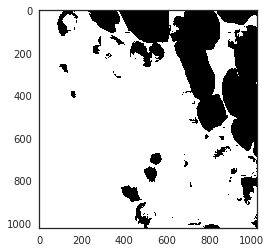

In [29]:
plt.imshow(ex_img)

example segmentation masks - majority are high quality. False segmentations such as background are filtered out - For some poor quality tiles (H&E dye failed) segmentations will also be bad - will assess suitable threshold.

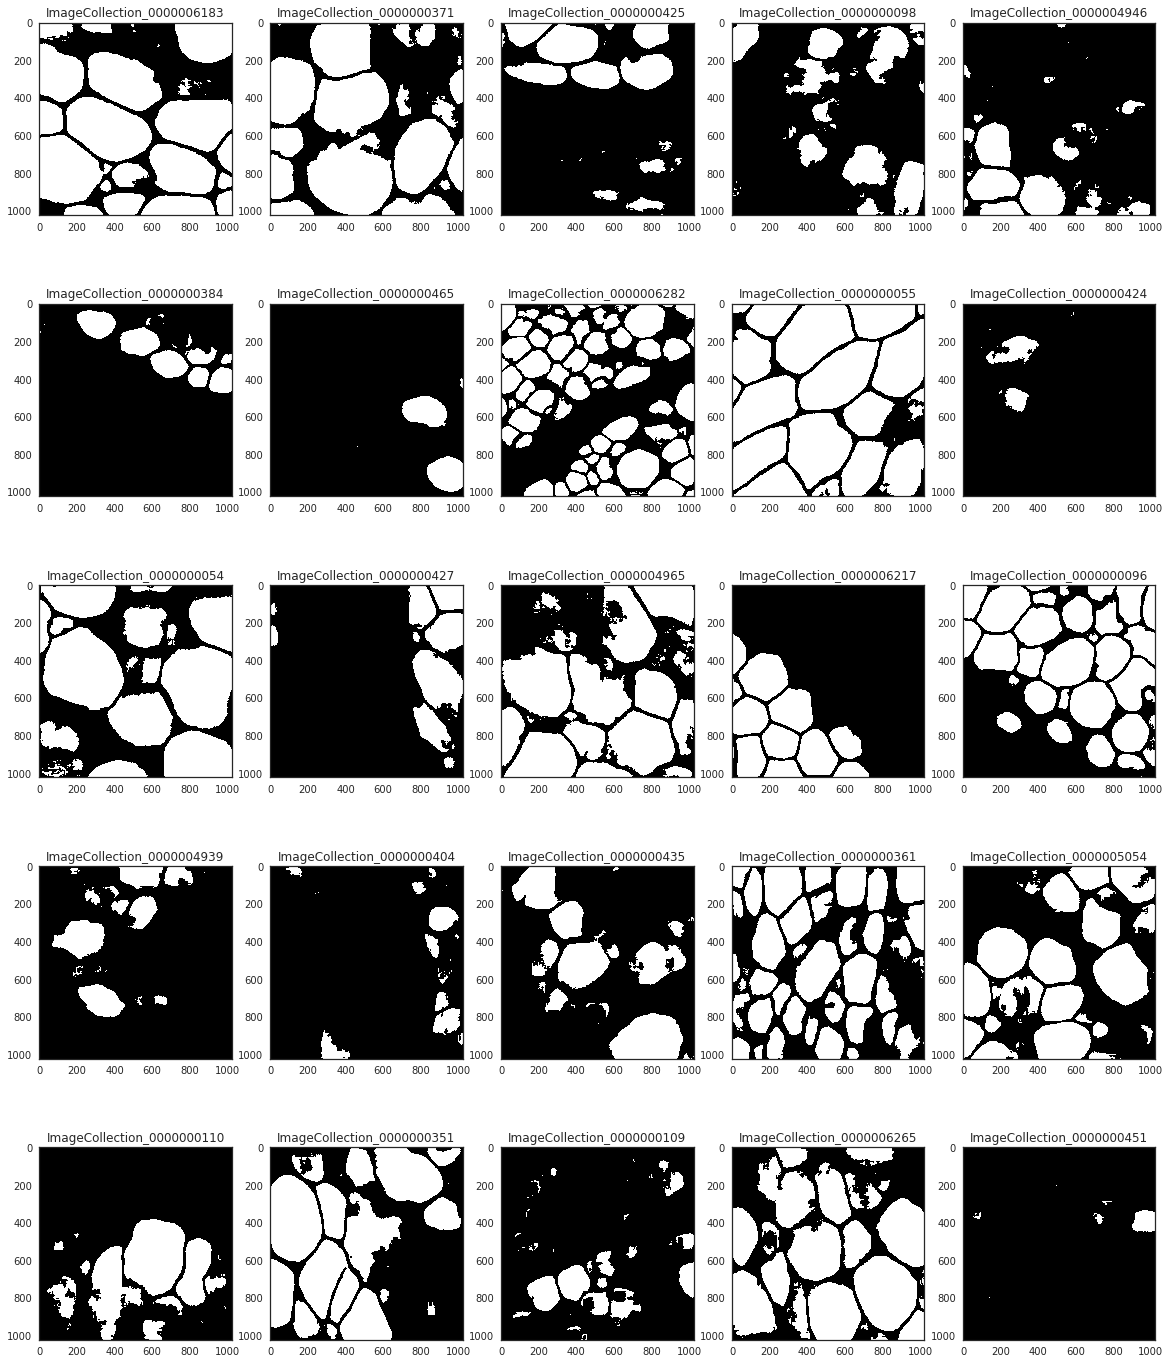

In [30]:
plot_me(list(np.random.choice(seg_masks,size=25)))

In [31]:
from tqdm import tqdm

In [32]:
test_tiles[0].split('/')[4].split('_')[0:3]

['40960-108544', 'ImageCollection', '0000000049']

In [22]:
seg_masks.sort(key = lambda x: x.split('/')[2].split('_')[2:5])
test_tiles.sort(key = lambda x: x.split('/')[4].split('_')[0:3])

In [23]:
adipocyte_tiles.sort_values(by=['image'],inplace=True,ascending=True)

In [24]:
test_tiles[0:5],seg_masks[0:5]

(['../NDOG_histology/patches/ImageCollection_0000000090_2018-05-12 16_10_07/12288-78848_ImageCollection_0000000090_2018-05-12 16_10_07.scn.jpg',
  '../NDOG_histology/patches/ImageCollection_0000000104_2018-05-12 15_52_26/13312-54272_ImageCollection_0000000104_2018-05-12 15_52_26.scn.jpg',
  '../NDOG_histology/patches/ImageCollection_0000000104_2018-05-12 15_52_26/13312-55296_ImageCollection_0000000104_2018-05-12 15_52_26.scn.jpg',
  '../NDOG_histology/patches/ImageCollection_0000000090_2018-05-12 16_10_07/13312-78848_ImageCollection_0000000090_2018-05-12 16_10_07.scn.jpg',
  '../NDOG_histology/patches/ImageCollection_0000000090_2018-05-12 16_10_07/13312-79872_ImageCollection_0000000090_2018-05-12 16_10_07.scn.jpg'],
 ['predicted_masks/NDOG/Pred_Mask_12288-78848_ImageCollection_0000000090_2018-05-12 16_10_07.png',
  'predicted_masks/NDOG/Pred_Mask_13312-54272_ImageCollection_0000000104_2018-05-12 15_52_26.png',
  'predicted_masks/NDOG/Pred_Mask_13312-55296_ImageCollection_0000000104_201

In [36]:
#For each preproduced segmentation mask, calculate the area of all cells, the average and the count 
measurements = []
with open('NDOG_areas','w') as out:
    for i in tqdm(seg_masks):
        prd_meas = predict_areas(cv2.imread(i,0))
        # list of cell areas, followed by average area and count of cells.
        measurements.append(prd_meas)

measurements = np.array(measurements)
np.save('NDOG_measurements.npy',measurements)

100%|██████████| 114627/114627 [1:02:33<00:00, 30.54it/s]


In [25]:
# run the above cell previously, so we'll load in the data now.
measurements = np.load('NDOG_measurements.npy')

In [26]:
len(test_tiles),len(seg_masks),len(measurements)


(114627, 119193, 114627)

In [27]:
# filter out the 1500 seg masks that have counts under 20 (0.63% of all masks)
seg_masks_filt= seg_masks
measurements_filt = measurements


In [28]:
len(seg_masks_filt),len(measurements_filt)

(119193, 114627)

In [29]:
print('Total number of cells measured in experiment: {}'.format(sum([len(a) for a in measurements_filt])))

Total number of cells measured in experiment: 1412367


In [30]:
# create list of indexes that seperate subcutaneous from visceral tiles.
subq_tiles_filt = list(np.where(np.array(adipocyte_tiles['depot']) =='subcutaneous')[0])
visceral_tiles_filt = list(np.where(np.array(adipocyte_tiles['depot']) =='visceral')[0])

In [31]:
print('subq: {}, visceral: {}, total tiles: {}'.format(len(subq_tiles_filt),len(visceral_tiles_filt),len(visceral_tiles_filt)+len(subq_tiles_filt)))

subq: 94153, visceral: 20474, total tiles: 114627


In [32]:
from operator import itemgetter

In [33]:
# obtain subq and visceral measurements
subq_measurements_filt = itemgetter(*subq_tiles_filt)(measurements_filt)
visceral_measurements_filt = itemgetter(*visceral_tiles_filt)(measurements_filt)

subq_seg_masks_filt=itemgetter(*subq_tiles_filt)(seg_masks_filt)
visceral_seg_masks_filt=itemgetter(*visceral_tiles_filt)(seg_masks_filt)

In [34]:
subq_mean_areas = np.array([np.mean(i) for i in subq_measurements_filt])
visc_mean_areas = np.array([np.mean(i) for i in visceral_measurements_filt])

In [64]:
from scipy import stats
from scipy.stats import ttest_ind as ttest

print('Clear difference in means between depots:-\nSubq: {0:.2f} +/- {1:.2f} \nVisceral:\
 {2:.2f} +/- {3:.2f}'.format(np.nanmean(subq_mean_areas),np.nanstd(subq_mean_areas),
                             np.nanmean(visc_mean_areas),np.nanstd(visc_mean_areas)))

#ttest(subq_mean_areas,visc_mean_areas,equal_var=False)

Clear difference in means between depots:-
Subq: 1773.06 +/- 826.94 
Visceral: 1796.93 +/- 790.20


In [35]:
subq_areas = pd.DataFrame(
    {'mean_areas': subq_mean_areas,
     'tissue': np.repeat('Subcutaneous',len(subq_mean_areas))
    })

visc_areas = pd.DataFrame(
    {'mean_areas': visc_mean_areas,
     'tissue': np.repeat('Visceral',len(visc_mean_areas))
    })

In [36]:
from collections import defaultdict

subq_samples=defaultdict(list)
visc_samples=defaultdict(list)

**Now, we need to operate at the individual sample level. So we will create a dictionary {Exeter_ID}: [areas]**

In [37]:
# Some Subq samples have no tiles after this filtering.
for i,a in enumerate(subq_measurements_filt):
    NDOG_ID = '_'.join(subq_seg_masks_filt[i].split('/')[2].split('_')[3:5])
    try:
        if len(subq_measurements_filt[i]) == 0:
            next
        else:
            subq_samples[NDOG_ID].append(subq_measurements_filt[i])
    except KeyError:
        if len(subq_measurements_filt[i]) == 0:
            next
        else:
            subq_samples[NDOG_ID] = subq_measurements_filt[i]


In [38]:
# Some Subq samples have no tiles after this filtering.
for i,a in enumerate(visceral_measurements_filt):
    NDOG_ID = '_'.join(visceral_seg_masks_filt[i].split('/')[2].split('_')[3:5])
    try:
        if len(visceral_measurements_filt[i]) == 0:
            next
        else:
            visc_samples[NDOG_ID].append(visceral_measurements_filt[i])
    except KeyError:
        if len(visceral_measurements_filt[i]) == 0:
            next
        else:
            visc_samples[NDOG_ID] = visceral_measurements_filt[i]

In [39]:
'_'.join(seg_masks_filt[i].split('/')[-1].split('_')[3:5])

'ImageCollection_0000000360'

In [40]:
example_id = [item for sublist in subq_samples['ImageCollection_0000005054'] for item in sublist]
print('ImageCollection_0000005054 has {} tiles containing {} unique adipocyte measurements'.format(len(subq_samples['ImageCollection_0000005054']),len(example_id)))

ImageCollection_0000005054 has 360 tiles containing 4257 unique adipocyte measurements


In [41]:
# lets set a seed and do some random sampling. We want to assess how the variance changes for adipocyte
# area estimates when measuring 3, 10, 100, 500 and 1000 cells.

np.random.seed(1337)
def simulate_cells(n,data,mean=True):
    sub=[]
    for i in range(100):
        if mean == True:
            sub.append(statistics.mean(np.random.choice(data,n)))
        else:
            sub.append(statistics.stdev(np.random.choice(data,n)))
    return (sub)
    

In [42]:
three = simulate_cells(n=3,data=example_id)
ten = simulate_cells(n=10,data=example_id)
hundred = simulate_cells(n=100,data=example_id)
fivehundred = simulate_cells(n=500,data=example_id)
thousand = simulate_cells(n=1000,data=example_id)

In [43]:
simulation = pd.DataFrame(
    {'1000': thousand,
     '500': fivehundred,
     '100': hundred,
     '10':ten,
     '3': three
    })

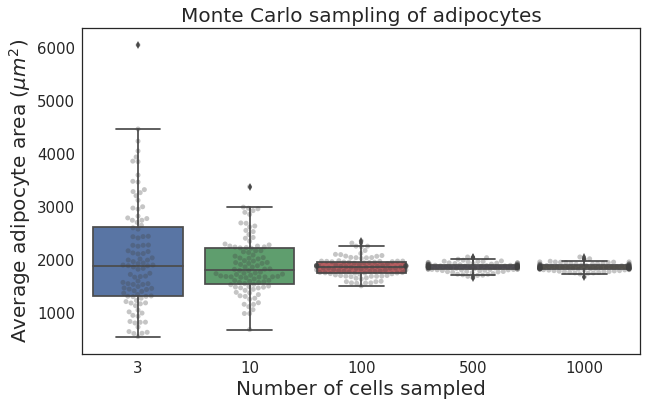

In [45]:
plt.figure(figsize=(10,6))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
sns.set_style("white")
ax = sns.boxplot(data=simulation,order=['3','10','100','500','1000'])
ax = sns.swarmplot(data=simulation, color=".25",order=['3','10','100','500','1000'],alpha=.3)
plt.xlabel('Number of cells sampled',fontsize=20)
plt.ylabel('Average adipocyte area ($\mu m^{2}$)',fontsize=20)
plt.title('Monte Carlo sampling of adipocytes',fontsize=20)
plt.savefig('mc_sampling_NDOG.pdf')

**Lets assess how many cells we have measured per sample (on average)**

In [46]:
subq_no_cells_per_sample=[]
for key,value in subq_samples.items():
    subq_no_cells_per_sample.append(len([item for sublist in subq_samples[key] for item in sublist]))

visc_no_cells_per_sample=[]
for key,value in visc_samples.items():
    visc_no_cells_per_sample.append(len([item for sublist in visc_samples[key] for item in sublist]))

In [47]:
subq_no_tiles_per_sample=[]
for key,value in subq_samples.items():
    subq_no_tiles_per_sample.append(len([item for item in subq_samples[key]]))

visc_no_tiles_per_sample=[]
for key,value in visc_samples.items():
    visc_no_tiles_per_sample.append(len([item for item in visc_samples[key]]))

In [48]:
print('Subcutaneous histology samples on average have {0:.0f} cells measured'.format(np.mean(subq_no_cells_per_sample)))

Subcutaneous histology samples on average have 2560 cells measured


In [49]:
print('Visceral fat histology samples on average have {0:.0f} cells measured'.format(np.mean(visc_no_cells_per_sample)))

Visceral fat histology samples on average have 641 cells measured


In [50]:
# return the key value at the nth position in a dictionary
def ix(dic, n): 
   try:
       return list(dic)[n]
   except IndexError:
       print('not enough keys')

In [51]:
#which sample has the lowest number of adipocytes counted?
ix(dic=subq_samples,n=np.argmin(subq_no_cells_per_sample))

'ImageCollection_0000005134'

In [52]:
#which sample has the highest number of adipocytes counted?
ix(dic=subq_samples,n=np.argmax(subq_no_cells_per_sample))

'ImageCollection_0000000386'

In [53]:
# plot subcutaneous and visceral cell distributions on a single plot.
# calculate adipocyte area mean and variance.

In [54]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

**Lets plot the adipocyte area distributions for all cells across all samples:**

Text(0.5, 1.0, 'Subcutaneous')

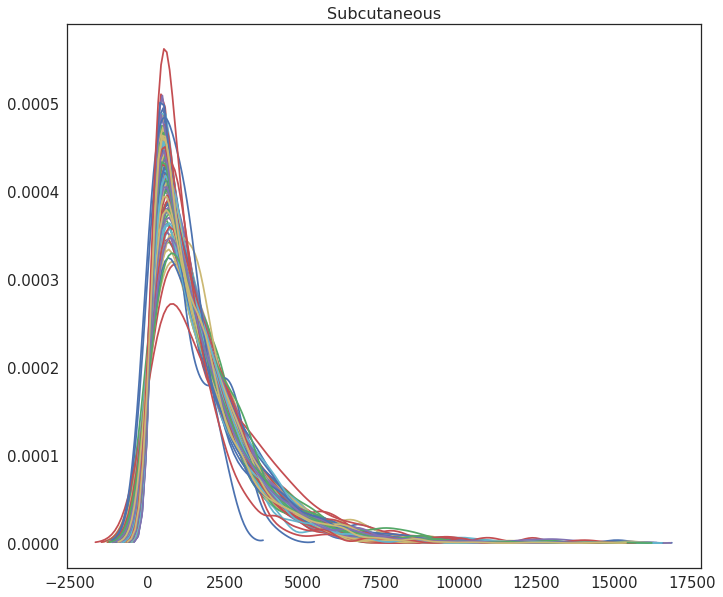

In [55]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,2,1)
ax.grid(b="off")
for key,value in take(125, subq_samples.items()):
    sns.distplot([item for sublist in value for item in sublist],hist=False)
plt.title('Subcutaneous',size=16)




**We will randomly select 500 cells from each sample to measure.**

In [56]:
subq_sample_areas={}

for key,value in subq_samples.items():
    tmp = [item for sublist in value for item in sublist]
    tmp = [x for x in tmp if x <= 30000]
    if len(tmp) >=500:
        selection = np.random.choice(tmp,500)
        small_std = np.mean(selection) - np.std(selection)
        high_std = np.mean(selection) + np.std(selection)
        small = sum([a < small_std for a in selection])
        large = sum([a > high_std for a in selection])
        ratio_s = small/(large+small)
        
        subq_sample_areas[key] = np.mean(selection),np.std(selection),ratio_s
    else:
        next

visc_sample_areas={}

for key,value in visc_samples.items():
    tmp = [item for sublist in value for item in sublist]
    tmp = [x for x in tmp if x <= 30000]
    if len(tmp) >=500:
        selection = np.random.choice(tmp,500)
        small_std = np.mean(selection) - np.std(selection)
        high_std = np.mean(selection) + np.std(selection)
        small = sum([a < 2000 for a in selection])
        large = sum([a > 4000 for a in selection])
        ratio_s = small/(large+small)
        
        visc_sample_areas[key] = np.mean(selection),np.std(selection),ratio_s
    else:
        next

In [57]:
for i,v in take(10,subq_sample_areas.items()):
    print(i,v)

ImageCollection_0000004990 (1974.273, 1633.3734944660162, 0.4017857142857143)
ImageCollection_0000005000 (2033.6955, 1850.0526992152143, 0.0)
ImageCollection_0000006217 (1951.43275, 1924.1650947535825, 0.0)
ImageCollection_0000000341 (1713.80575, 1725.30574265152, 0.0)
ImageCollection_0000000453 (1597.51175, 1427.7644700564892, 0.0)
ImageCollection_0000000063 (1668.12975, 1478.138038935915, 0.0)
ImageCollection_0000006288 (1833.175625, 1671.2475071619172, 0.0)
ImageCollection_0000006236 (1689.7715, 1540.6412986278638, 0.0)
ImageCollection_0000000434 (1667.792875, 1602.0485768318392, 0.0)
ImageCollection_0000005143 (1804.895125, 1524.9816751848764, 0.33884297520661155)


In [59]:
# lets convert the dictionaries into dataframes so we can add and analyse additional covariates
subq_sample_area_df = pd.DataFrame(subq_sample_areas).T.rename_axis('sampleID').add_prefix('Area').reset_index()
subq_sample_area_df.columns = ['SUBJID', 'mu_area','var_area','per_small_cells']

visc_sample_area_df = pd.DataFrame(visc_sample_areas).T.rename_axis('sampleID').add_prefix('Area').reset_index()
visc_sample_area_df.columns = ['SUBJID', 'mu_area','var_area','per_small_cells']

In [60]:
# lets have a quick look at both the subQ table so far:
display_side_by_side(subq_sample_area_df.head(), visc_sample_area_df.head())


,SUBJID,mu_area,var_area,per_small_cells
0,ImageCollection_0000000049,1618.916125,1450.869699,0.000000
1,ImageCollection_0000000050,1781.802750,1500.165358,0.375000
2,ImageCollection_0000000051,1767.365000,1522.369961,0.232323
3,ImageCollection_0000000053,1813.585750,1724.217714,0.000000
4,ImageCollection_0000000054,1816.969750,1721.578128,0.000000
,SUBJID,mu_area,var_area,per_small_cells
0,ImageCollection_0000000049,1623.909000,1294.107310,0.917738
1,ImageCollection_0000000050,1981.679875,1796.826920,0.854111
2,ImageCollection_0000000051,1726.403125,1589.302804,0.893899
3,ImageCollection_0000000053,1677.019125,1377.018338,0.898396


Lets look at the distribution of mean adipocyte area across samples:

In [81]:
adipocyte_tiles['SUBJID'] = ['_'.join(x.split('_')[0:2]) for x in adipocyte_tiles['filename']]

In [83]:
NDOG_IDS = []
for sample_id in subq_sample_area_df['SUBJID']:
    indi = adipocyte_tiles.index[adipocyte_tiles['SUBJID'] == sample_id].tolist()[0]
    NDOG_IDS.append(adipocyte_tiles['ID'][indi])


In [84]:
subq_sample_area_df['SUBJID_ID'] = NDOG_IDS

In [85]:
NDOG_IDS = []
for sample_id in visc_sample_area_df['SUBJID']:
    indi = adipocyte_tiles.index[adipocyte_tiles['SUBJID'] == sample_id].tolist()[0]
    NDOG_IDS.append(adipocyte_tiles['ID'][indi])


In [86]:
visc_sample_area_df['SUBJID_ID'] = NDOG_IDS

In [87]:
len(visc_sample_area_df),len(subq_sample_area_df)

(42, 308)

In [88]:
visc_sample_area_df.to_csv('final_cohort_measurements/NDOG_Visceral_areas.csv')
subq_sample_area_df.to_csv('final_cohort_measurements/NDOG_Subq_areas.csv')

In [298]:
visc_sample_area_df = pd.read_csv('final_cohort_measurements/NDOG_Visceral_areas.csv')
subq_sample_area_df = pd.read_csv('final_cohort_measurements/NDOG_Subq_areas.csv')

In [299]:
visc_sample_area_df['SUBJID_ID'] = ["-".join(x.split('-')[0:2]).split('-F')[0] for x in visc_sample_area_df['SUBJID_ID']]

In [300]:
ndog_ids = []
for sub_id in visc_sample_area_df['SUBJID_ID']:
    if sub_id[0].isnumeric():
        ndog_ids.append('EX'+str(sub_id))
    elif "-" in sub_id:
        ndog_ids.append("".join(sub_id.split('-')))
    else:
        ndog_ids.append(sub_id)
        
        
        

In [301]:
visc_sample_area_df['SUBJID_ID'] = ndog_ids

In [302]:
subq_sample_area_df['SUBJID_ID'] = ["-".join(x.split('-')[0:2]).split('-F')[0] for x in subq_sample_area_df['SUBJID_ID']]

In [303]:
ndog_ids = []
for sub_id in subq_sample_area_df['SUBJID_ID']:
    if sub_id[0].isnumeric():
        ndog_ids.append('EX'+str(sub_id))
    elif "-" in sub_id:
        ndog_ids.append("".join(sub_id.split('-')))
    else:
        ndog_ids.append(sub_id)
        

In [304]:
subq_sample_area_df['SUBJID_ID'] = ndog_ids

In [305]:
subq_sample_area_df.head()

,Unnamed: 0,SUBJID,mu_area,var_area,per_small_cells,SUBJID_ID
0,0,ImageCollection_0000000049,1189.515625,896.789544,0.430769,EX0351
1,1,ImageCollection_0000000050,2128.934500,1805.873798,0.354331,EX0357
2,2,ImageCollection_0000000051,2197.628000,1890.358878,0.352000,EX0363
3,3,ImageCollection_0000000053,2343.811750,1778.051966,0.490566,EX0332
4,4,ImageCollection_0000000054,3084.245625,2833.250797,0.181818,EX0334


In [357]:
ndog_phenotypes = pd.read_csv('endox_phenotypes.csv')

In [358]:
ndog_phenotypes.head()

,Subject ID,Height,Weight,Hip circumference,Waist circumference
0,EX-0015,152.40,54.0,100.0,74.0
1,EX-0016,170.00,53.0,96.0,68.0
2,EX-0020,172.72,61.0,101.0,66.0
3,EX-0022,160.02,50.0,93.0,71.0
4,EX-0025,165.10,72.0,107.0,92.0


In [359]:
ndog_phenotypes.Height = ndog_phenotypes.Height/100

In [360]:
ndog_phenotypes['Hip circumference'] = ndog_phenotypes['Hip circumference']/100

In [361]:
ndog_phenotypes['Waist circumference'] = ndog_phenotypes['Waist circumference']/100

In [362]:
ndog_phenotypes_clean = ndog_phenotypes

In [363]:
ndog_phenotypes_clean.head()

,Subject ID,Height,Weight,Hip circumference,Waist circumference
0,EX-0015,1.5240,54.0,1.00,0.74
1,EX-0016,1.7000,53.0,0.96,0.68
2,EX-0020,1.7272,61.0,1.01,0.66
3,EX-0022,1.6002,50.0,0.93,0.71
4,EX-0025,1.6510,72.0,1.07,0.92


In [364]:
ndog_phenotypes_clean['BMI'] = ndog_phenotypes_clean.Weight/(ndog_phenotypes_clean.Height**2)

In [365]:
ndog_phenotypes_clean.head()

,Subject ID,Height,Weight,Hip circumference,Waist circumference,BMI
0,EX-0015,1.5240,54.0,1.00,0.74,23.250047
1,EX-0016,1.7000,53.0,0.96,0.68,18.339100
2,EX-0020,1.7272,61.0,1.01,0.66,20.447705
3,EX-0022,1.6002,50.0,0.93,0.71,19.526368
4,EX-0025,1.6510,72.0,1.07,0.92,26.414254


<a list of 20 Patch objects>

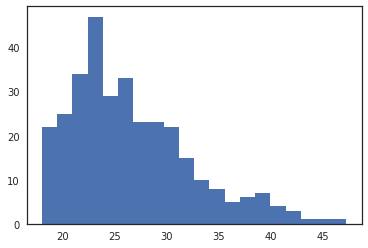

In [366]:
plt.hist(ndog_phenotypes_clean.BMI,bins=20)[2]

In [367]:
ndog_phenotypes_clean['Subject ID'] = ["".join(x.split('-')[:2]) for x in ndog_phenotypes_clean['Subject ID']]

In [368]:
ndog_phenotypes_clean.head()

,Subject ID,Height,Weight,Hip circumference,Waist circumference,BMI
0,EX0015,1.5240,54.0,1.00,0.74,23.250047
1,EX0016,1.7000,53.0,0.96,0.68,18.339100
2,EX0020,1.7272,61.0,1.01,0.66,20.447705
3,EX0022,1.6002,50.0,0.93,0.71,19.526368
4,EX0025,1.6510,72.0,1.07,0.92,26.414254


In [378]:
np.mean(ndog_phenotypes_clean.BMI)

26.535121158182132

In [369]:
ndog_age = pd.read_csv('NDOG_ages.csv')

In [377]:
np.mean(ndog_age.Age)

32.90106007067138

In [370]:
new_id =[]
for num in [x.split('EX')[1] for x in ndog_age.ENDOXID]:
    if len(num) == 2:
        new_id.append('EX00' + str(num))
    if len(num) == 3:
        new_id.append('EX0' + num)

In [371]:
ndog_age.ENDOXID = new_id

In [372]:
subq_and_pheno = pd.merge(subq_sample_area_df,ndog_phenotypes_clean,left_on='SUBJID_ID',right_on="Subject ID",how='outer')

In [373]:
subq_and_pheno.shape

(346, 12)

In [374]:
subq_and_pheno = pd.merge(subq_and_pheno,ndog_age,left_on='SUBJID_ID',right_on='ENDOXID',how='outer').drop(['ENDOXID','Subject ID'],axis=1)

In [375]:
subq_and_pheno.shape

(397, 12)

In [325]:
subq_and_pheno = subq_and_pheno[~subq_and_pheno.mu_area.isna()]

In [326]:
subq_and_pheno.shape

(310, 12)

In [327]:
visc_and_pheno = pd.merge(visc_sample_area_df,ndog_phenotypes_clean,left_on='SUBJID_ID',right_on="Subject ID",how='outer')

In [328]:
visc_and_pheno = pd.merge(visc_and_pheno,ndog_age,left_on='SUBJID_ID',right_on='ENDOXID',how='outer').drop(['ENDOXID','Subject ID'],axis=1)

In [329]:
visc_and_pheno.shape

(581, 12)

In [330]:
visc_and_pheno = visc_and_pheno[~visc_and_pheno.mu_area.isna()]

In [331]:
visc_and_pheno.to_csv('final_cohort_measurements/NDOG_Visceral_areas.csv')
subq_and_pheno.to_csv('final_cohort_measurements/NDOG_Subq_areas.csv')

In [332]:
visc_and_pheno.shape,subq_and_pheno.shape

((42, 12), (310, 12))

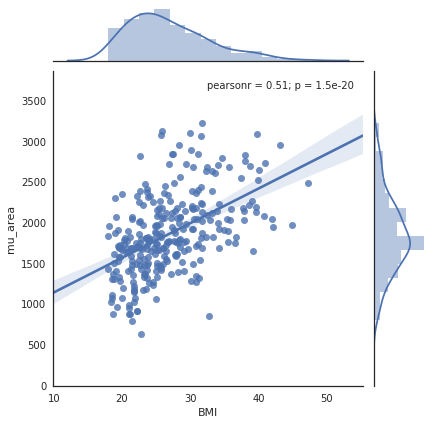

In [333]:
sns.jointplot(y="mu_area",x="BMI",data=subq_and_pheno,kind='reg')

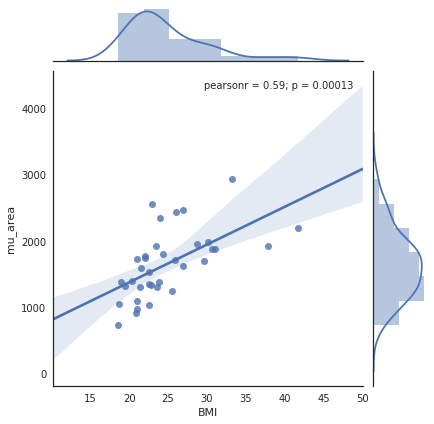

In [334]:
sns.jointplot(y="mu_area",x="BMI",data=visc_and_pheno,kind='reg')

In [335]:
sum(visc_and_pheno.Age.isna())

4

In [338]:
np.mean(subq_and_pheno.mu_area),np.mean(visc_and_pheno.mu_area)

(1841.920861290324, 1710.7637678571423)

In [349]:
subq_and_pheno = pd.read_csv('final_cohort_measurements/NDOG_Subq_areas.csv')
visc_and_pheno = pd.read_csv('final_cohort_measurements/NDOG_Visceral_areas.csv')

Text(0.5, 0, 'Mean Adipocyte Area ($\\mu m^{2}$)')

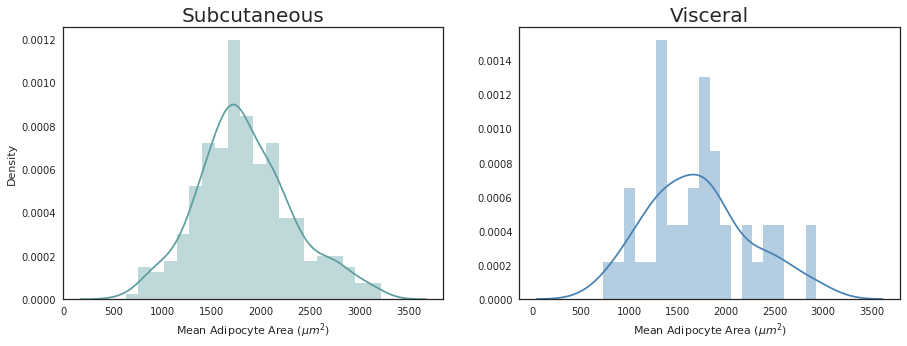

In [350]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.distplot(np.array(subq_and_pheno['mu_area'].tolist()),color='cadetblue',bins=20)
plt.title('Subcutaneous',size=20)
plt.xlabel('Mean Adipocyte Area ($\mu m^{2}$)')
plt.ylabel('Density')

ax = fig.add_subplot(1,2,2)
sns.distplot(np.array(visc_and_pheno['mu_area'].tolist()),color='steelblue',bins=20)
plt.title('Visceral',size=20)
plt.xlabel('Mean Adipocyte Area ($\mu m^{2}$)')


In [351]:
from scipy import stats
from scipy.stats import ttest_ind as ttest

test_stats=ttest(np.array(visc_and_pheno['mu_area'].tolist()),np.array(subq_and_pheno['mu_area'].tolist()),equal_var=False)

print('T-stastistic is: {0:.3f} with P-value = {1}'.format(test_stats[0],test_stats[1]))

T-stastistic is: -1.536 with P-value = 0.1307329222488768


In [353]:
print('The mean adipocyte areas are: \nSubcutaneous: {0:.2f}\nVisceral: {1:.2f}'.format(np.mean(subq_and_pheno['mu_area']),np.mean(visc_and_pheno['mu_area'])))

The mean adipocyte areas are: 
Subcutaneous: 1841.92
Visceral: 1710.76


In [354]:
np.std(subq_and_pheno['mu_area']),np.std(visc_and_pheno['mu_area'])

(483.5497753324616, 517.6178493775341)